## Battery Life Prediction Module- Documentation

This notebook explains how to use the module ``predict_capacity`` for predicting the remaining life of lithium batteries. 

There are two main functions in this module. One is called ``partial_to_full``, which links the partial cycle curve to one full cycle curve. The other is called ``get_lifetime``, which gives all the parameters to diagnose the battery using the full cycle curve information. 
This module also includes a set of auxiliar functions that include:

1. ``curve_distance``: Calculates the dynamic time wraping distance between two time series
2. ``distance_cycle_to_full``: Calculates the distances between one partial cycle curve and a set of full cycle curves. 
3. ``life_plot``: This is a visualization function, that plots the results from the prediction method.


In [1]:
import predict_capacity

/Users/rossana13/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In the following cells, each function will be run using as an example one of the CALCE Matlab files. 
For the partial curves under examination, the file *converted_PL03.mat* will be used. For the full cycle curves, the file will be *converted_PL11.mat*.
To load this files, use ``sort_data`` module (ref. Data Cleaning Package Documentation)

In [2]:
import sort_data
PL03c,PL03d = sort_data.charge_discharge('converted_PL03.mat')
full_curvesc,full_curvesd = sort_data.charge_discharge('converted_PL11.mat')

For this tutorial, only a sample from this data will be used. In the following cell, a sample from the partial discharge and the full discharge cycles is taken

In [3]:
#Make a shorter partial curve dictionary to uses as train set (because if not the code takes too long)
PL03d_short = {}
for idx in range(1, len(PL03d.keys()), 50):
        if idx in PL03d.keys():
            if idx not in PL03d_short.keys():
                PL03d_short[idx] = PL03d[idx]
full_curvesd_short = {}
for idx in range(1, len(full_curvesd.keys()), 50):
        if idx in full_curvesd.keys():
            if idx not in full_curvesd_short.keys():
                full_curvesd_short[idx] = full_curvesd[idx]                

Now, apply ``get_lifetime`` to get the predictive parameters. For this, the original capacity of the battery under study must be input, in this case that value is 1.5.

In [4]:
Percent, Time, Slope, Intercept, Life = predict_capacity.get_lifetime(PL03d_short,full_curvesd_short,1.5)

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

Use the visualization function to see the parameters easily.
For example for the first and second partial curves tested in this tutorial, the result will be as follows

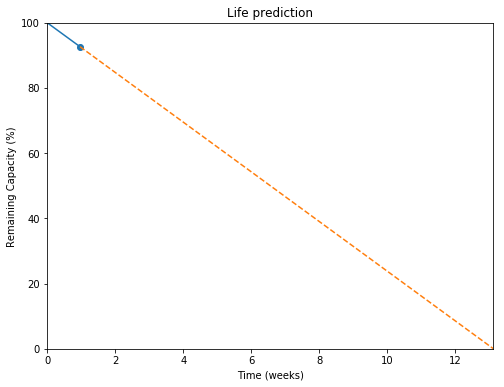

In [5]:
predict_capacity.life_plot(Time[0],Slope[0],Intercept[0],Percent[0],Life[0])

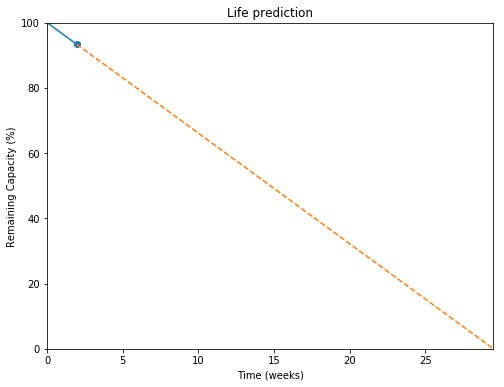

In [6]:
predict_capacity.life_plot(Time[1],Slope[1],Intercept[1],Percent[1],Life[1])